In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt




In [18]:
# load
data = pd.read_csv('twitter-followers.csv')

# quick checks
print("Columns:", list(data.columns))
print("Preview:")
display(data.head())
print("Shape:", data.shape)

data.columns = data.columns.str.strip()
print("Clean columns:", list(data.columns))

data['FOLLOWER'] = data['FOLLOWER'].astype(str)
data['FOLLOWEE'] = data['FOLLOWEE'].astype(str)

Columns: ['FOLLOWER', 'FOLLOWEE']
Preview:


,FOLLOWER,FOLLOWEE
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


Shape: (834797, 2)
Clean columns: ['FOLLOWER', 'FOLLOWEE']


In [19]:
G = nx.from_pandas_edgelist(data, source='FOLLOWER', target='FOLLOWEE', create_using=nx.DiGraph())

print("Graph built.")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Graph built.
Number of nodes: 465017
Number of edges: 834797


In [20]:
sample_nodes = list(G.nodes())[:10]
print("Sample nodes (10):", sample_nodes)

deg_series = pd.Series(dict(G.in_degree()))
print("In-degree: min, max, mean")
print(deg_series.min(), deg_series.max(), round(deg_series.mean(),2))


Sample nodes (10): ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
In-degree: min, max, mean
0 199 1.8


In [21]:
topN = 20
in_deg = dict(G.in_degree())
top_accounts = sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:topN]
print(f"Top {topN} accounts by in-degree:")
for acc, cnt in top_accounts:
    print(acc, cnt)


Top 20 accounts by in-degree:
643 199
1405 174
5486 174
1379 161
1471 153
2748 151
2467 150
612 144
14047 139
5449 133
14715 132
731 130
3580 127
14670 126
5592 124
5898 124
14705 124
7166 121
25923 121
10652 120


Subgraph nodes: 2707 edges: 10226


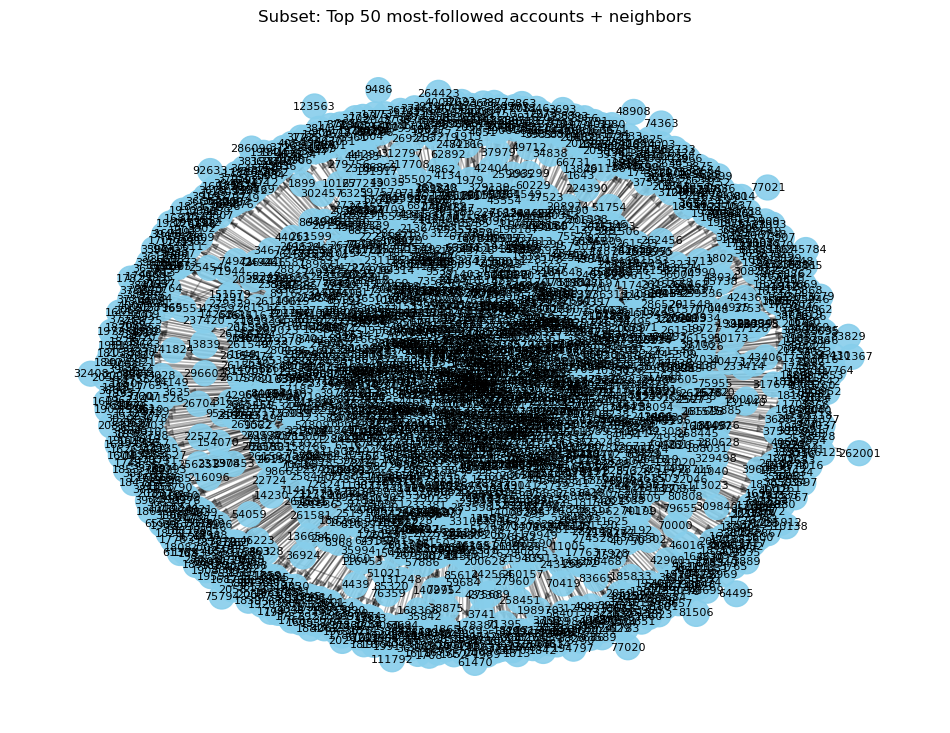

In [22]:
top_nodes = [n for n, _ in sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:50]]
nodes_for_plot = set(top_nodes)
for n in top_nodes:
    nodes_for_plot.update(list(G.predecessors(n)))   # followers
    nodes_for_plot.update(list(G.successors(n)))    # followees

H = G.subgraph(nodes_for_plot).copy()
print("Subgraph nodes:", H.number_of_nodes(), "edges:", H.number_of_edges())

# layout and sizes
pos = nx.spring_layout(H, seed=42, k=0.5)
node_sizes = [300 + 20 * in_deg.get(n, 0) for n in H.nodes()]  # scale by in-degree

plt.figure(figsize=(12,9))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(H, pos, alpha=0.3, arrowsize=10)
nx.draw_networkx_labels(H, pos, font_size=8)
plt.title("Subset: Top 50 most-followed accounts + neighbors")
plt.axis('off')
plt.show()


In [24]:
print("Computing PageRank ")
pagerank = nx.pagerank(G, alpha=0.85)   

scores_df = pd.DataFrame({
    'node': list(G.nodes()),
    'in_degree': [in_deg.get(n, 0) for n in G.nodes()],
    'out_degree': [d for _, d in G.out_degree()],
    'pagerank': [pagerank.get(n, 0) for n in G.nodes()]
})

scores_df = scores_df.sort_values('pagerank', ascending=False)
scores_df.head(20).to_csv('node_scores_top20.csv', index=False)
print("Top 20 node scores saved to node_scores_top20.csv")
display(scores_df.head(10))


Computing PageRank 
Top 20 node scores saved to node_scores_top20.csv


,node,in_degree,out_degree,pagerank
5485,5486,174,0,0.000006
642,643,199,479,0.000006
21274,21275,92,0,0.000005
13846,13847,82,0,0.000005
611,612,144,0,0.000004
5591,5592,124,183,0.000004
1378,1379,161,0,0.000004
1404,1405,174,0,0.000004
3579,3580,127,491,0.000004
5448,5449,133,0,0.000004
